In [1]:
import os
from glob import glob
from skimage import data, io, feature, color, exposure
import numpy as np
import cv2

from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

import seaborn as sns
%matplotlib inline

# declare functions

In [183]:
lfw2 = os.path.join('..', 'Data', 'lfw2')
def image_path(person, id_, lfw_folder = lfw2):
    return glob(os.path.join(lfw_folder, person, '*' + id_ + '.jpg'))[0]

In [74]:
'''
Parameters: 
    - img_matrix: (ndarray)
    - title: (string)
Output:
    - image plot
'''
def plt_img(img_matrix, title='Image', normalize=False):
    if normalize:
        plt.imshow(img_matrix, vmin=np.min(img_matrix), vmax=np.max(img_matrix), cmap='gray')
    else:
        io.imshow(img_matrix)
    plt.title(title)
    plt.show()

In [338]:
def plt_two_imgs(img_a, img_b, cmap='gray', normalize=False):
    f = plt.figure(figsize=(12, 8))
    f.add_subplot(1,2, 1)
    if normalize:
        plt.imshow(img_a, vmin=np.min(img_matrix), vmax=np.max(img_matrix), cmap=cmap)
    else:
        plt.imshow(img_a, cmap=cmap)
    f.add_subplot(1,2, 2)
    if normalize:
        plt.imshow(img_b, vmin=np.min(img_matrix), vmax=np.max(img_matrix), cmap=cmap)
    else:
        plt.imshow(img_b, cmap=cmap)
    
    plt.show(block=True)
    
    

In [4]:
'''
Parameters: 
- Path: The image should be in the working directory or a full path of image
should be given;
- color: Second argument is a flag which specifies the way image should be read.
    cv2.IMREAD_COLOR : Loads a color image. Any transparency of image
    will be neglected;
    cv2.IMREAD_GRAYSCALE : Loads image in grayscale mode;
    cv2.IMREAD_UNCHANGED : Loads image as such including alpha channel;
Note Instead of these three flags, you can simply pass integers 1, 0 or -1
respectively.
Output:
- img_array: (ndarray)
'''
def open_img(path, color=0):
    return cv2.imread(path, color)

In [186]:
'''
Parameters:
- path_img: A string representing the file name. The filename must include image format like .jpg, .png, etc.

- img: It is the image that is to be saved (ndarray).

Return Value: It returns true if image is saved successfully.
'''

def save_img(path_img, img):
    cv2.imwrite(path_img, img) 

In [187]:
def getDF(path):
    with open(path) as f:
        file_list = f.readlines()
    n = int(file_list[0].strip())
    df_inicial = pd.read_csv(path, sep='\t', skiprows=1, nrows=n, names=['pair_name_1', 'pair_id_1', 'pair_id_2'])
    df_inicial['pair_name_2'] = None
    df_secondary = pd.read_csv(path, sep='\t', skiprows=n+1, names=['pair_name_1', 'pair_id_1', 'pair_name_2', 'pair_id_2'])
    df = pd.concat([df_inicial, df_secondary])
    df = df.reset_index(drop=True)
    print(df.shape)
    return df

In [188]:
def plt_img_batch(df, show=False, limit=np.inf):
    for index, row in df.iterrows():
        plt_img(open_img(row['path_pair_id_1'], color=0), title=os.path.split(row['path_pair_id_1'])[-1].split('.')[0])
        plt_img(open_img(row['path_pair_id_2'], color=0), title=os.path.split(row['path_pair_id_2'])[-1].split('.')[0])
        if limit == index + 1:
            break

# example

In [189]:
# data_folder = os.path.abspath('..\\data\\')
data_folder = os.path.join('..', 'Data')
train_path = Path(data_folder, 'pairsDevTrain.txt')
test_path = Path(data_folder, 'pairsDevTest.txt')

In [190]:
df_train = getDF(train_path)
df_test = getDF(test_path)

(2200, 4)
(1000, 4)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [191]:
df_train['path_pair_id_1'] = df_train.apply(lambda x: image_path(person=x['pair_name_1'], id_= str(x['pair_id_1'])), axis=1)
df_train['path_pair_id_2'] = df_train.apply(lambda x: image_path(person=x['pair_name_1'], id_= str(x['pair_id_2'])) if x['pair_name_2']==None 
                                            else image_path(person=x['pair_name_2'], id_= str(x['pair_id_2'])), axis=1)

df_test['path_pair_id_1'] = df_test.apply(lambda x: image_path(person=x['pair_name_1'], id_= str(x['pair_id_1'])), axis=1)
df_test['path_pair_id_2'] = df_test.apply(lambda x: image_path(person=x['pair_name_1'], id_= str(x['pair_id_2'])) if x['pair_name_2']==None 
                                          else image_path(person=x['pair_name_2'], id_= str(x['pair_id_2'])), axis=1)

In [192]:
df_train.head()

,pair_id_1,pair_id_2,pair_name_1,pair_name_2,path_pair_id_1,path_pair_id_2
0,1,2,Aaron_Peirsol,None,..\Data\lfw2\Aaron_Peirsol\Aaron_Peirsol_0001.jpg,..\Data\lfw2\Aaron_Peirsol\Aaron_Peirsol_0002.jpg
1,3,4,Aaron_Peirsol,None,..\Data\lfw2\Aaron_Peirsol\Aaron_Peirsol_0003.jpg,..\Data\lfw2\Aaron_Peirsol\Aaron_Peirsol_0004.jpg
2,1,2,Aaron_Sorkin,None,..\Data\lfw2\Aaron_Sorkin\Aaron_Sorkin_0001.jpg,..\Data\lfw2\Aaron_Sorkin\Aaron_Sorkin_0002.jpg
3,1,2,Abdel_Nasser_Assidi,None,..\Data\lfw2\Abdel_Nasser_Assidi\Abdel_Nasser_...,..\Data\lfw2\Abdel_Nasser_Assidi\Abdel_Nasser_...
4,1,3,Abdullah,None,..\Data\lfw2\Abdullah\Abdullah_0001.jpg,..\Data\lfw2\Abdullah\Abdullah_0003.jpg


In [193]:
df_test.head()

,pair_id_1,pair_id_2,pair_name_1,pair_name_2,path_pair_id_1,path_pair_id_2
0,13,14,Abdullah_Gul,None,..\Data\lfw2\Abdullah_Gul\Abdullah_Gul_0013.jpg,..\Data\lfw2\Abdullah_Gul\Abdullah_Gul_0014.jpg
1,13,16,Abdullah_Gul,None,..\Data\lfw2\Abdullah_Gul\Abdullah_Gul_0013.jpg,..\Data\lfw2\Abdullah_Gul\Abdullah_Gul_0016.jpg
2,1,2,Abdullatif_Sener,None,..\Data\lfw2\Abdullatif_Sener\Abdullatif_Sener...,..\Data\lfw2\Abdullatif_Sener\Abdullatif_Sener...
3,1,3,Adel_Al-Jubeir,None,..\Data\lfw2\Adel_Al-Jubeir\Adel_Al-Jubeir_000...,..\Data\lfw2\Adel_Al-Jubeir\Adel_Al-Jubeir_000...
4,1,2,Al_Pacino,None,..\Data\lfw2\Al_Pacino\Al_Pacino_0001.jpg,..\Data\lfw2\Al_Pacino\Al_Pacino_0002.jpg


## One image

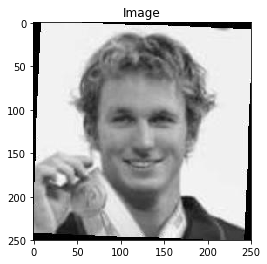

In [194]:
# plt_image method receives a ndarray (Figure)
plt_img(open_img(df_train.loc[0, 'path_pair_id_1'], color=0))

## Batch image

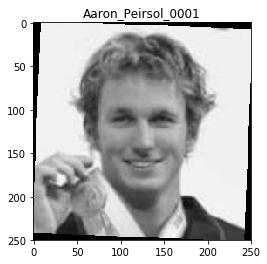

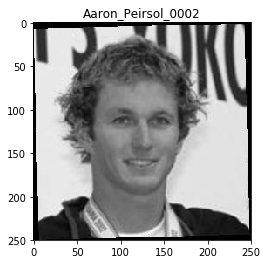

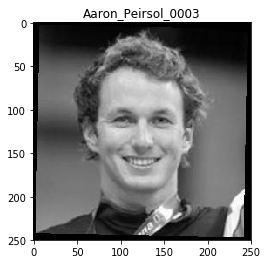

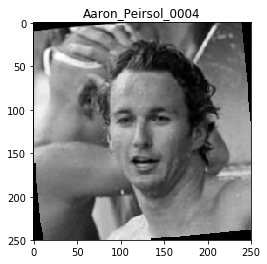

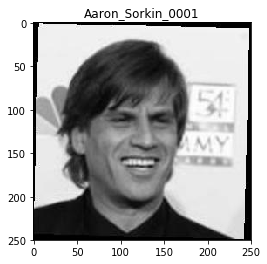

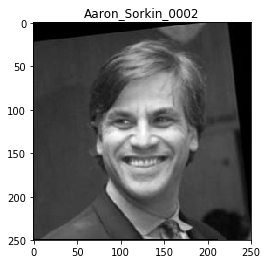

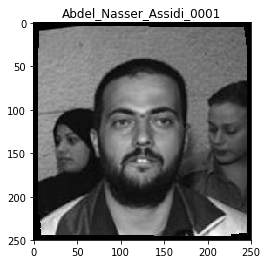

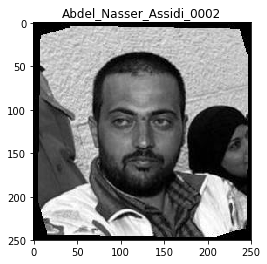

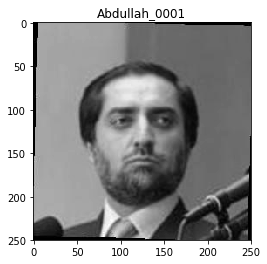

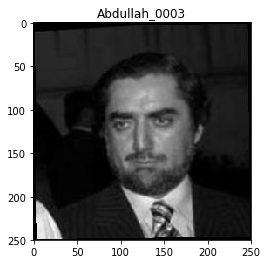

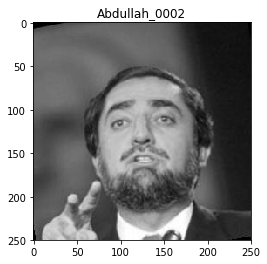

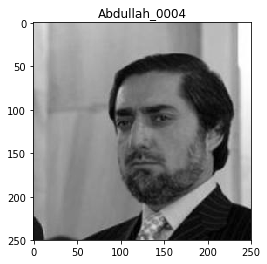

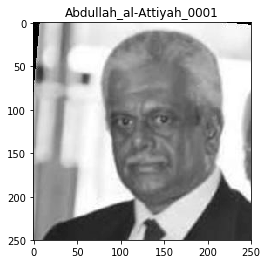

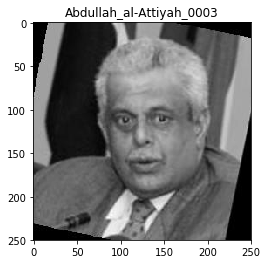

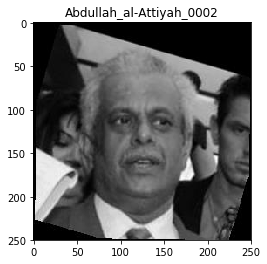

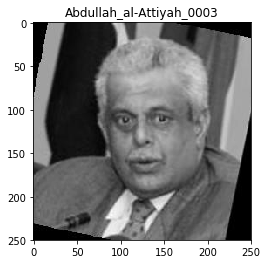

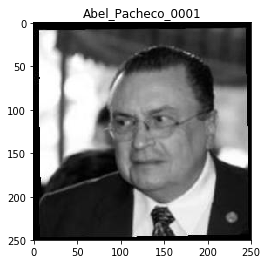

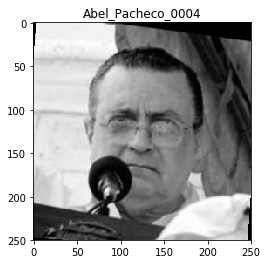

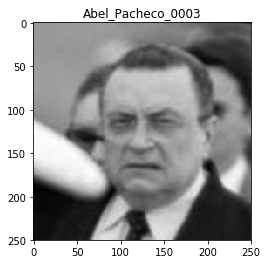

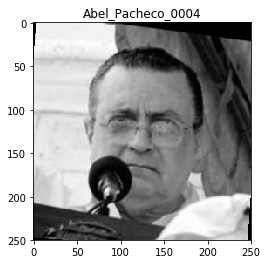

In [195]:
plt_img_batch(df=df_train, limit=10)

# Viola Jones

In [15]:
def plot_rectangle(detected_faces, image, title='Image', cmap_type='gray', kwargs={'lw': 20.}):
    # Create figure and axes
    fig,ax = plt.subplots(1)
    # Display the image
    ax.imshow(image, cmap=cmap_type)
    plt.title(title)
    for (column, row, width, height) in detected_faces:
        rect = Rectangle(
                (column, row),
                width = width,
                height = height,
                fill=False,
                edgecolor='r',
                
                )
        # Add the patch to the Axes
        ax.add_patch(rect)
#     plt.axis('off')
    plt.show()

In [16]:
def crop_image(original_image, column, row, width, height):
    # the goal is crop the biggest area
    return original_image[row:row+height, column:column + width]


### Load the classifier and create a cascade object for face detection

In [17]:
cascade_path = os.path.join('..', 'haarcascades', 'haarcascade_frontalface_alt.xml')
face_cascade = cv2.CascadeClassifier(cascade_path)

In [202]:
def detect(image, scaleFactor = 1.1, minNeighbors = 5, minSize = (30, 30)):
    # detect faces in the image
    rects = face_cascade.detectMultiScale(image,
                scaleFactor = scaleFactor, minNeighbors = minNeighbors,
                minSize = minSize, flags = cv2.CASCADE_SCALE_IMAGE)

## Image with one face

In [18]:
original_image = open_img(df_train.loc[0, 'path_pair_id_1'], color=0)
grayscale_image = original_image.copy()

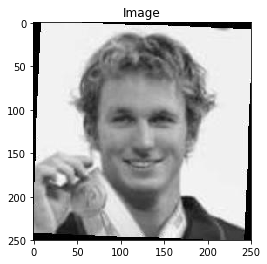

In [19]:
plt_img(original_image)

In [20]:
detected_faces = face_cascade.detectMultiScale(grayscale_image, minNeighbors=)
# detected_faces = detect(grayscale_image)

In [21]:
# (column, row, width, height)
detected_faces

array([[ 63,  63, 127, 127]], dtype=int32)

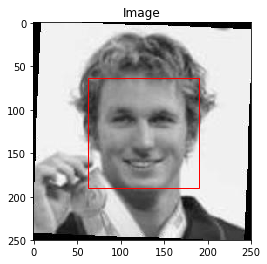

In [22]:
# Plot: area with facial recognition 
plot_rectangle(detected_faces, grayscale_image)

In [23]:
column, row, width, height = detected_faces[0]
cropped_image = crop_image(original_image=original_image, column=column, row=row, 
                           width=width, height=height)

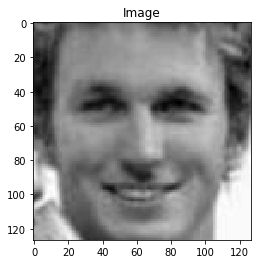

In [24]:
plt_img(cropped_image)

In [25]:
cropped_image.shape

(127, 127)

## Image with two or more faces

In [26]:
original_image = open_img(df_train.loc[3, 'path_pair_id_1'], color=0)
grayscale_image = original_image.copy()

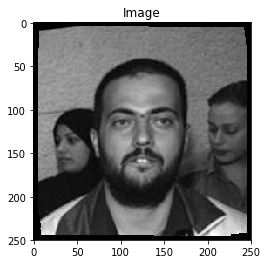

In [27]:
plt_img(original_image)

In [28]:
detected_faces = face_cascade.detectMultiScale(grayscale_image)

In [29]:
# ndarray with more than one row
detected_faces

array([[ 66,  66, 118, 118],
       [ 12, 117,  51,  51],
       [185, 101,  60,  60]], dtype=int32)

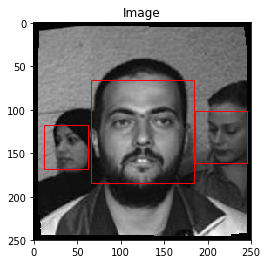

In [30]:
plot_rectangle(detected_faces, grayscale_image)

### Plot 1º rectangle

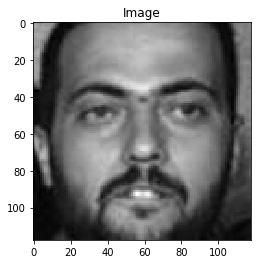

In [31]:
cropped_image = crop_image(original_image=original_image, column=detected_faces[0,0], row=detected_faces[0,1], 
                           width=detected_faces[0,2], height=detected_faces[0,3])

plt_img(cropped_image)

### Plot 2º rectangle

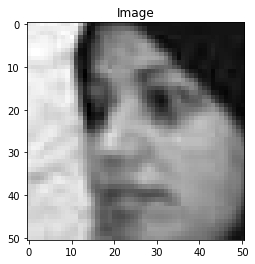

In [32]:
cropped_image = crop_image(original_image=original_image, column=detected_faces[1,0], row=detected_faces[1,1], 
                           width=detected_faces[1,2], height=detected_faces[1,3])

plt_img(cropped_image)

### Plot 3º rectangle

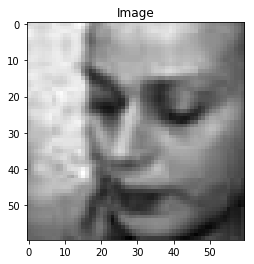

In [33]:
cropped_image = crop_image(original_image=original_image, column=detected_faces[2,0], row=detected_faces[2,1], 
                           width=detected_faces[2,2], height=detected_faces[2,3])

plt_img(cropped_image)

## Problem: what image to use?
### Response: Use the biggest area

In [34]:
def crop_biggest_area(original_image, detected_faces):
    
    # the goal is crop the biggest area
    if len(detected_faces) == 0: # viola jones didnt recognize any face
        return original_image, (None, None, original_image.shape[0], original_image.shape[1])
    else:
        # detected_faces returns: column, row, width, height
        # So, assuming all width == height
        # get np.argmax of height
        id_max_max_width = np.argmax(detected_faces[:, -1])
        column, row, width, height = detected_faces[id_max_max_width]
        return crop_image(original_image, column, row, width, height), (column, row, width, height)

In [35]:
cropped_image, _ = crop_biggest_area(original_image, detected_faces)

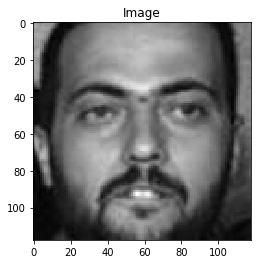

In [36]:
plt_img(cropped_image)

In [37]:
cropped_image.shape

(118, 118)

## Problem: images with differents shapes
### Response: Use the resize methods. So, cropped all images, then used resize methods to get a standard shape

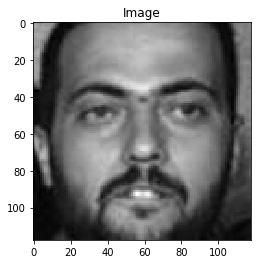

In [38]:
plt_img(cropped_image)

In [39]:
cropped_image.shape

(118, 118)

In [40]:
# UP dimension
width = 350
height = 350
dim = (width, height)
# resize image
resized = cv2.resize(cropped_image, dim, interpolation = cv2.INTER_AREA)

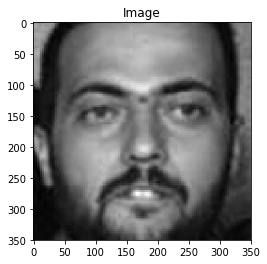

In [41]:
plt_img(resized)

In [42]:
# Down dimension
width = 70
height = 70
dim = (width, height)
# resize image
resized = cv2.resize(cropped_image, dim, interpolation = cv2.INTER_AREA)

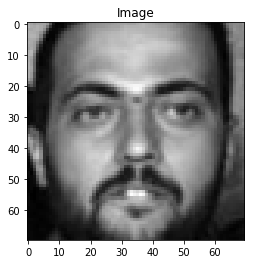

In [43]:
plt_img(resized)

### Update df_train and df_test

In [44]:
df_train['path_pair_id_1_cropped'] = df_train['path_pair_id_1'].apply(lambda x: x.replace('lfw2', 'lfw2_cropped'))
_ = df_train['path_pair_id_1_cropped'].apply(lambda x: None if os.path.isdir(os.path.split(x)[0]) else os.mkdir(os.path.split(x)[0]))

df_train['path_pair_id_2_cropped'] = df_train['path_pair_id_2'].apply(lambda x: x.replace('lfw2', 'lfw2_cropped'))
_ = df_train['path_pair_id_2_cropped'].apply(lambda x: None if os.path.isdir(os.path.split(x)[0]) else os.mkdir(os.path.split(x)[0]))

In [45]:
df_test['path_pair_id_1_cropped'] = df_test['path_pair_id_1'].apply(lambda x: x.replace('lfw2', 'lfw2_cropped'))
_ = df_test['path_pair_id_1_cropped'].apply(lambda x: None if os.path.isdir(os.path.split(x)[0]) else os.mkdir(os.path.split(x)[0]))

df_test['path_pair_id_2_cropped'] = df_test['path_pair_id_2'].apply(lambda x: x.replace('lfw2', 'lfw2_cropped'))
_ = df_test['path_pair_id_2_cropped'].apply(lambda x: None if os.path.isdir(os.path.split(x)[0]) else os.mkdir(os.path.split(x)[0]))

In [46]:
df_train.head()

,pair_id_1,pair_id_2,pair_name_1,pair_name_2,path_pair_id_1,path_pair_id_2,path_pair_id_1_cropped,path_pair_id_2_cropped
0,1,2,Aaron_Peirsol,None,..\Data\lfw2\Aaron_Peirsol\Aaron_Peirsol_0001.jpg,..\Data\lfw2\Aaron_Peirsol\Aaron_Peirsol_0002.jpg,..\Data\lfw2_cropped\Aaron_Peirsol\Aaron_Peirs...,..\Data\lfw2_cropped\Aaron_Peirsol\Aaron_Peirs...
1,3,4,Aaron_Peirsol,None,..\Data\lfw2\Aaron_Peirsol\Aaron_Peirsol_0003.jpg,..\Data\lfw2\Aaron_Peirsol\Aaron_Peirsol_0004.jpg,..\Data\lfw2_cropped\Aaron_Peirsol\Aaron_Peirs...,..\Data\lfw2_cropped\Aaron_Peirsol\Aaron_Peirs...
2,1,2,Aaron_Sorkin,None,..\Data\lfw2\Aaron_Sorkin\Aaron_Sorkin_0001.jpg,..\Data\lfw2\Aaron_Sorkin\Aaron_Sorkin_0002.jpg,..\Data\lfw2_cropped\Aaron_Sorkin\Aaron_Sorkin...,..\Data\lfw2_cropped\Aaron_Sorkin\Aaron_Sorkin...
3,1,2,Abdel_Nasser_Assidi,None,..\Data\lfw2\Abdel_Nasser_Assidi\Abdel_Nasser_...,..\Data\lfw2\Abdel_Nasser_Assidi\Abdel_Nasser_...,..\Data\lfw2_cropped\Abdel_Nasser_Assidi\Abdel...,..\Data\lfw2_cropped\Abdel_Nasser_Assidi\Abdel...
4,1,3,Abdullah,None,..\Data\lfw2\Abdullah\Abdullah_0001.jpg,..\Data\lfw2\Abdullah\Abdullah_0003.jpg,..\Data\lfw2_cropped\Abdullah\Abdullah_0001.jpg,..\Data\lfw2_cropped\Abdullah\Abdullah_0003.jpg


In [47]:
df_test.head()

,pair_id_1,pair_id_2,pair_name_1,pair_name_2,path_pair_id_1,path_pair_id_2,path_pair_id_1_cropped,path_pair_id_2_cropped
0,13,14,Abdullah_Gul,None,..\Data\lfw2\Abdullah_Gul\Abdullah_Gul_0013.jpg,..\Data\lfw2\Abdullah_Gul\Abdullah_Gul_0014.jpg,..\Data\lfw2_cropped\Abdullah_Gul\Abdullah_Gul...,..\Data\lfw2_cropped\Abdullah_Gul\Abdullah_Gul...
1,13,16,Abdullah_Gul,None,..\Data\lfw2\Abdullah_Gul\Abdullah_Gul_0013.jpg,..\Data\lfw2\Abdullah_Gul\Abdullah_Gul_0016.jpg,..\Data\lfw2_cropped\Abdullah_Gul\Abdullah_Gul...,..\Data\lfw2_cropped\Abdullah_Gul\Abdullah_Gul...
2,1,2,Abdullatif_Sener,None,..\Data\lfw2\Abdullatif_Sener\Abdullatif_Sener...,..\Data\lfw2\Abdullatif_Sener\Abdullatif_Sener...,..\Data\lfw2_cropped\Abdullatif_Sener\Abdullat...,..\Data\lfw2_cropped\Abdullatif_Sener\Abdullat...
3,1,3,Adel_Al-Jubeir,None,..\Data\lfw2\Adel_Al-Jubeir\Adel_Al-Jubeir_000...,..\Data\lfw2\Adel_Al-Jubeir\Adel_Al-Jubeir_000...,..\Data\lfw2_cropped\Adel_Al-Jubeir\Adel_Al-Ju...,..\Data\lfw2_cropped\Adel_Al-Jubeir\Adel_Al-Ju...
4,1,2,Al_Pacino,None,..\Data\lfw2\Al_Pacino\Al_Pacino_0001.jpg,..\Data\lfw2\Al_Pacino\Al_Pacino_0002.jpg,..\Data\lfw2_cropped\Al_Pacino\Al_Pacino_0001.jpg,..\Data\lfw2_cropped\Al_Pacino\Al_Pacino_0002.jpg


# Apply preprocessing for all images (run only if necessary)

## Apply preprocessing

In [ ]:
def preprocessing(path_image, path_to_save, dim=(100, 100)):
    original_image = open_img(path_image, color=0)
    grayscale_image = original_image.copy()
    detected_faces = face_cascade.detectMultiScale(grayscale_image)
    cropped_image, (column, row, width, height) = crop_biggest_area(original_image, detected_faces)
    resized = cv2.resize(cropped_image, dim, interpolation = cv2.INTER_AREA)
    save_img(path_img=path_to_save, img=resized)
    return (column, row, width, height)

### get dimensions VJ and apply pre-processing

In [ ]:
df_train['VJ_pair_id_1'] = df_train.apply(lambda x: preprocessing(path_image=x['path_pair_id_1'], path_to_save=x['path_pair_id_1_cropped']), axis=1)
df_train['VJ_pair_id_2'] = df_train.apply(lambda x: preprocessing(path_image=x['path_pair_id_2'], path_to_save=x['path_pair_id_2_cropped']), axis=1)

df_test['VJ_pair_id_1'] = df_test.apply(lambda x: preprocessing(path_image=x['path_pair_id_1'], path_to_save=x['path_pair_id_1_cropped']), axis=1)
df_test['VJ_pair_id_2'] = df_test.apply(lambda x: preprocessing(path_image=x['path_pair_id_2'], path_to_save=x['path_pair_id_2_cropped']), axis=1)

In [ ]:
df_train.head()

In [ ]:
df_test.head()

In [ ]:
aux = df_train['VJ_pair_id_1'].apply(lambda x: x[-1])
heights = pd.concat([aux, df_train['VJ_pair_id_2'].apply(lambda x: x[-1])], ignore_index=True)

In [ ]:
np.mean(heights)

In [ ]:
np.median(height)

In [ ]:
sns.distplot(heights)

# Histogram of Oriented Gradients
## create features vector

Parameters:
image(M, N[, C]) ndarray
Input image.

orientationsint, optional
Number of orientation bins.

pixels_per_cell2-tuple (int, int), optional
Size (in pixels) of a cell.

cells_per_block2-tuple (int, int), optional
Number of cells in each block.

block_norm str {‘L1’, ‘L1-sqrt’, ‘L2’, ‘L2-Hys’}, optional
Block normalization method:

visualizebool, optional
Also return an image of the HOG. For each cell and orientation bin, the image contains a line segment that is centered at the cell center, is perpendicular to the midpoint of the range of angles spanned by the orientation bin, and has intensity proportional to the corresponding histogram value.

transform_sqrtbool, optional
Apply power law compression to normalize the image before processing. DO NOT use this if the image contains negative values. Also see notes section below.

feature_vectorbool, optional
Return the data as a feature vector by calling .ravel() on the result just before returning.

multichannelboolean, optional
If True, the last image dimension is considered as a color channel, otherwise as spatial.

Returns:
out(n_blocks_row, n_blocks_col, n_cells_row, n_cells_col, n_orient) ndarray
HOG descriptor for the image. If feature_vector is True, a 1D (flattened) array is returned.

hog_image(M, N) ndarray, optional
A visualisation of the HOG image. Only provided if visualize is True.


Default parameters:
    (image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(3, 3), block_norm='L2-Hys', visualize=False, transform_sqrt=False, feature_vector=True, multichannel=None)

In [142]:
# https://scikit-image.org/docs/stable/api/skimage.feature.html#skimage.feature.hog
# https://www.learnopencv.com/histogram-of-oriented-gradients/
# https://jakevdp.github.io/PythonDataScienceHandbook/05.14-image-features.html
# https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_hog.html

In [303]:
path_test_image = df_train.loc[1, 'path_pair_id_1_cropped']
print(path_test_image)
test_image = open_img(path=path_test_image)
print(test_image.shape)

..\Data\lfw2_cropped\Aaron_Peirsol\Aaron_Peirsol_0003.jpg
(100, 100)


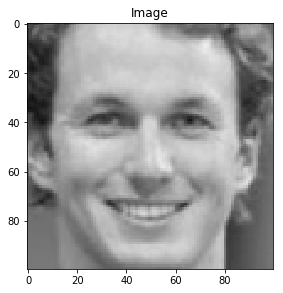

In [304]:
plt_img(test_image)

(8100,)


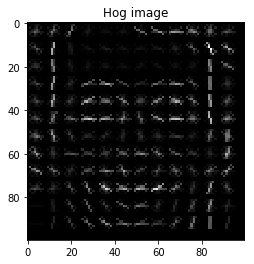

In [305]:
# Default
hog_vec, hog_vis = feature.hog(test_image, orientations=9, 
                               pixels_per_cell=(8, 8), cells_per_block=(3, 3),
                               block_norm='L2-Hys', visualize=True, transform_sqrt=False, 
                               feature_vector=True, multichannel=False)
print(hog_vec.shape)
plt_img(hog_vis, title='Hog image', normalize=True)

(4356,)


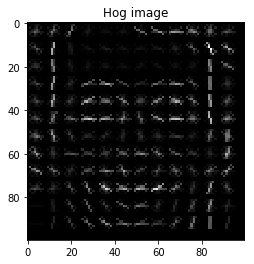

In [306]:
# Alter cells_per_block=(2,2) and block_norm=L1 like paper:
#https://lear.inrialpes.fr/people/triggs/pubs/Dalal-cvpr05.pdf
hog_vec, hog_vis = feature.hog(test_image, orientations=9, 
                               pixels_per_cell=(8, 8), cells_per_block=(2, 2),
                               block_norm='L1', visualize=True, transform_sqrt=False, 
                               feature_vector=True, multichannel=False)
print(hog_vec.shape)
plt_img(hog_vis, title='Hog image', normalize=True)

(1296,)


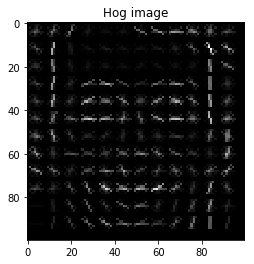

In [307]:
# Alter cells_per_block=(1,1)
hog_vec, hog_vis = feature.hog(test_image, orientations=9, 
                               pixels_per_cell=(8, 8), cells_per_block=(1, 1),
                               block_norm='L1', visualize=True, transform_sqrt=False, 
                               feature_vector=True, multichannel=False)
print(hog_vec.shape)
plt_img(hog_vis, title='Hog image', normalize=True)

### Testes reduzindo a imagem

In [308]:
resized = cv2.resize(test_image, (80,80), interpolation = cv2.INTER_AREA)

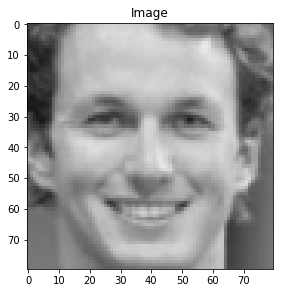

In [309]:
plt_img(resized)

(5184,)


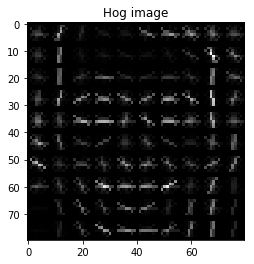

In [310]:
# Default parameters
hog_vec, hog_vis = feature.hog(resized, orientations=9, 
                               pixels_per_cell=(8, 8), cells_per_block=(3, 3),
                               block_norm='L2-Hys', visualize=True, transform_sqrt=False, 
                               feature_vector=True, multichannel=False)
print(hog_vec.shape)
plt_img(hog_vis, title='Hog image', normalize=True)

(900,)


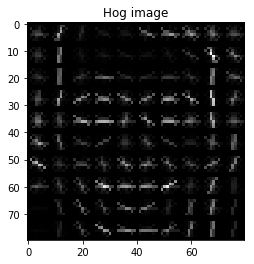

In [312]:
# Alter cells_per_block and block_norm=L1 like paper 
hog_vec, hog_vis = feature.hog(resized, orientations=9, 
                               pixels_per_cell=(8, 8), cells_per_block=(1, 1),
                               block_norm='L1', visualize=True, transform_sqrt=False, 
                               feature_vector=True, multichannel=False)
print(hog_vec.shape)
plt_img(hog_vis, title='Hog image', normalize=True)

## Compare two images

In [339]:
path_test_image1 = df_train.loc[0, 'path_pair_id_1_cropped']
print(path_test_image1)
test_image1 = open_img(path=path_test_image1)
print(test_image1.shape)

path_test_image2 = df_train.loc[0, 'path_pair_id_2_cropped']
print(path_test_image2)
test_image2 = open_img(path=path_test_image2)
print(test_image2.shape)

..\Data\lfw2_cropped\Aaron_Peirsol\Aaron_Peirsol_0001.jpg
(100, 100)
..\Data\lfw2_cropped\Aaron_Peirsol\Aaron_Peirsol_0002.jpg
(100, 100)


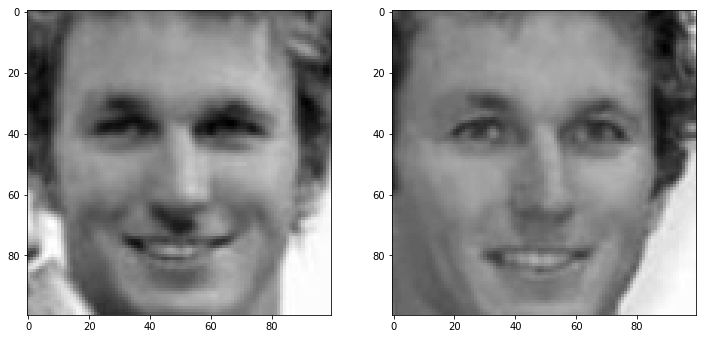

In [340]:
plt_two_imgs(test_image1, test_image2)

In [341]:
# Alter cells_per_block =(1,1)
hog_vec_1, hog_vis_1 = feature.hog(test_image1, orientations=9, 
                               pixels_per_cell=(8, 8), cells_per_block=(1, 1),
                               block_norm='L1', visualize=True, transform_sqrt=False, 
                               feature_vector=True, multichannel=False)
print(hog_vec_1.shape)

(1296,)


In [342]:
# Alter cells_per_block =(1,1)
hog_vec_2, hog_vis_2 = feature.hog(test_image2, orientations=9, 
                               pixels_per_cell=(8, 8), cells_per_block=(1, 1),
                               block_norm='L1', visualize=True, transform_sqrt=False, 
                               feature_vector=True, multichannel=False)
print(hog_vec_2.shape)

(1296,)


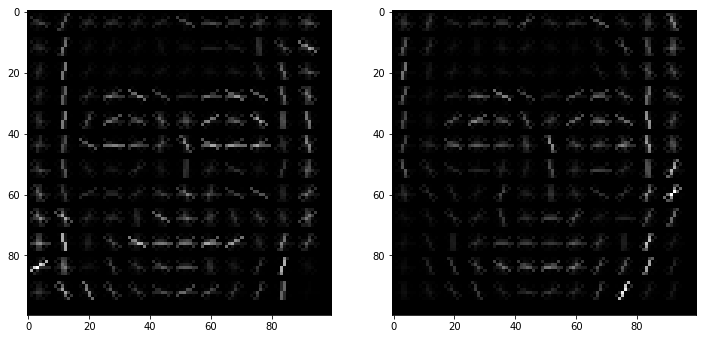

In [343]:
plt_two_imgs(img_a=hog_vis_1, img_b=hog_vis_2)

In [344]:
hog_vec_1

array([0.10045122, 0.04723528, 0.00452764, ..., 0.02651619, 0.12577734,
       0.05929201])

In [345]:
hog_vec_2

array([0.24029718, 0.08975598, 0.03011371, ..., 0.00514777, 0.02441802,
       0.17796108])

In [346]:
np.sum(np.abs(hog_vec_1, hog_vec_2))

143.99986083423232

In [172]:
all_test_paths = df_test['path_pair_id_1'].to_list() + df_test['path_pair_id_2'].to_list()
test_heights = getHeights(all_test_paths)

In [176]:
all_paths = np.unique(all_training_paths + all_test_paths)
print((len(all_paths), len(all_training_paths), len(all_test_paths)))

(4974, 4400, 2000)


In [177]:
import pickle
with open("../Data/all_files_list.txt", "wb") as fp:   #Pickling
    pickle.dump(all_paths, fp)